In [1]:
import os
import copy
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import random
import sys
import time
from importlib import reload
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import cut_tree

source_path = os.path.abspath("../source/")
sys.path.append(source_path)
import utils as ut
import plotting as plt2
import hypercore as hc
import matrix as matrix

([], [])

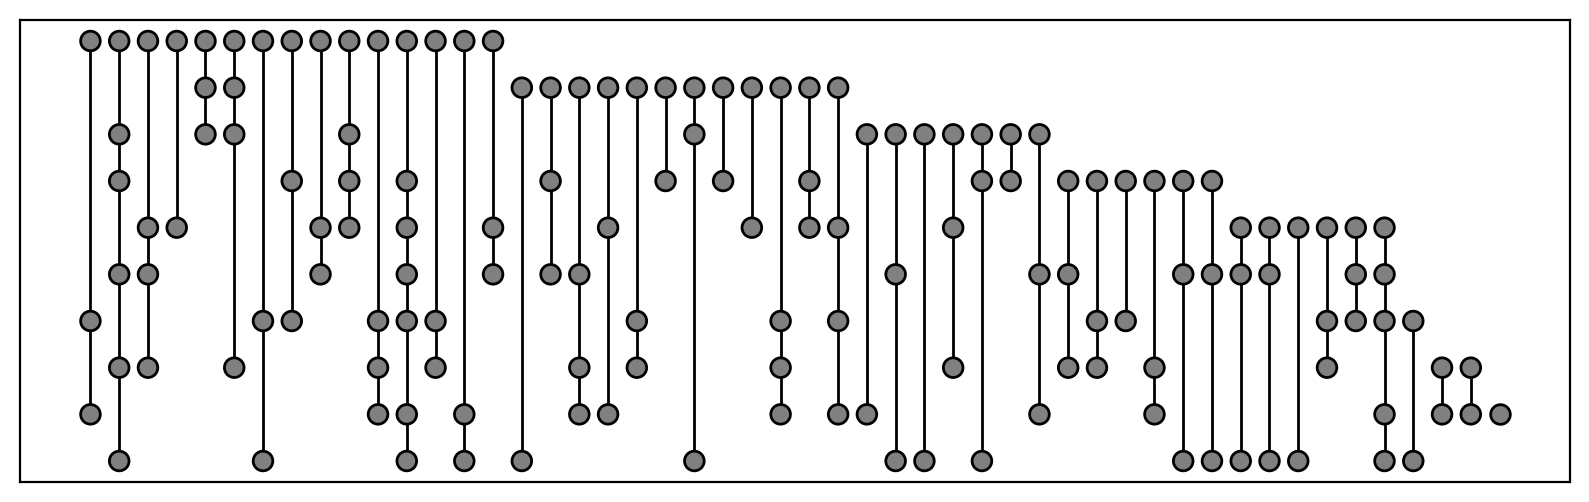

In [4]:
reload(ut)
n_rows = 10
n_cols = 50
I = ut.generate_incidence_matrix(n_rows=n_rows, 
                              n_cols=n_cols, 
                              order=3, 
                              min_count=3,
                              max_count=None)


node_params = {
    's' : 200,
    'ec' : 'k',
    'lw' : 1,
    'marker' : ".",
    'zorder' : 2,
}

line_params = {
    'lw' : 1,
    'zorder' : 1,
}
    
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 10, 3
plt2.plot_incidence(ut.sort_by_lowest_index(I),
                    node_color='grey',
                    line_color='k',
                    node_params=node_params,
                    line_params=line_params)

plt.yticks([])
plt.xticks([])

In [25]:
method = 'complete'
metric = 'jaccard'

linkage_matrix = linkage(I.T, method=method, metric=metric)
print(f"{linkage_matrix.shape=}")

core_size = 5
clusters = cut_tree(linkage_matrix, n_clusters=core_size) 
print(f"{clusters.shape=}")

linkage_matrix.shape=(49, 4)
clusters.shape=(50, 1)


([], [])

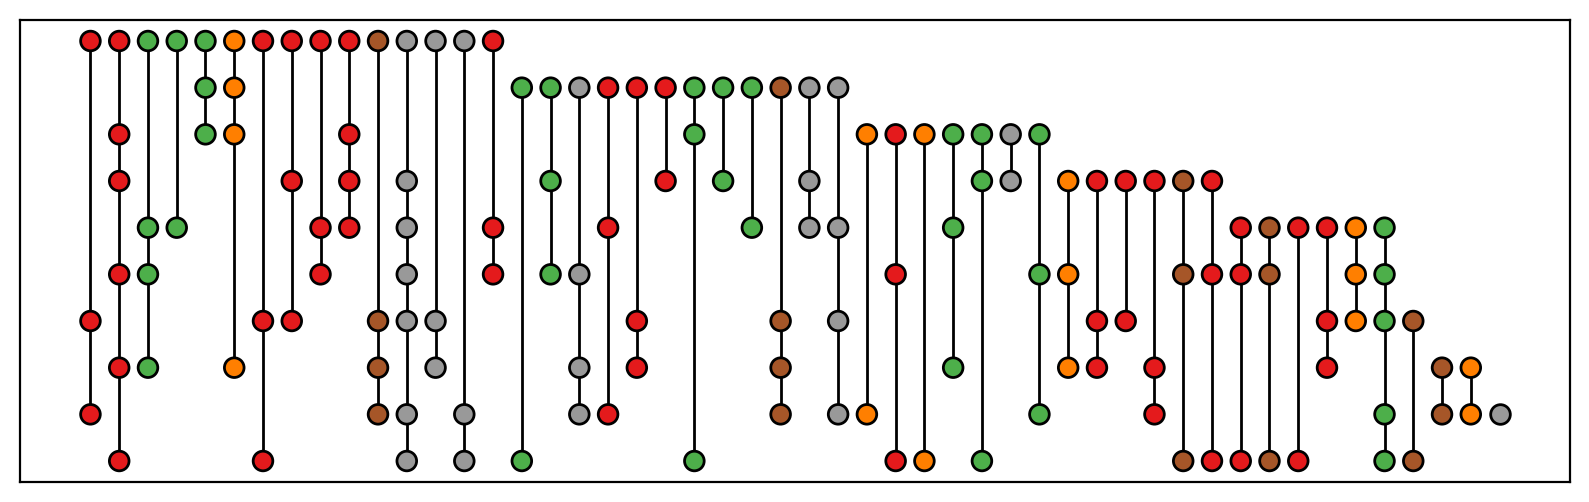

In [26]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 10, 3

plt2.plot_incidence(ut.sort_by_lowest_index(I),
                    node_color=plt2.floats_to_colors(clusters.ravel(), colormap='Set1'),
                    line_color='k',
                    node_params=node_params,
                    line_params=line_params)

plt.yticks([])
plt.xticks([])

([], [])

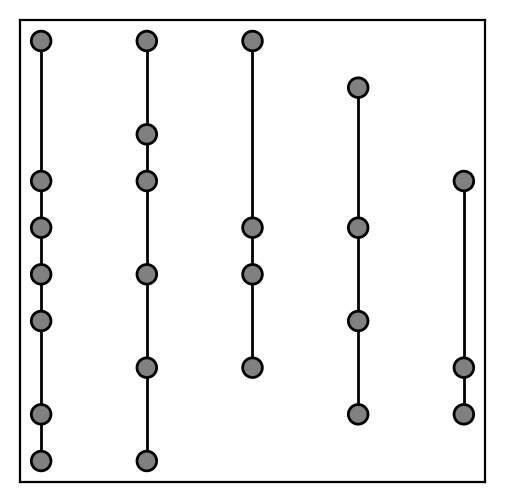

In [28]:
hcore = []

for cluster in np.unique(clusters):
    
    idx = np.argwhere(clusters.ravel() == cluster).ravel()
    columns = I.columns[idx]
    

    # random selection logic
    # rand_column = np.random.choice(columns, 1)[0]    
    # selected_hyperedge = I[rand_column]
    
    # largest order 
    orders = I[columns].sum(axis=0)
    idx = np.argmax(orders)
    selected_hyperedge = I[columns[idx]]
    hcore.append(selected_hyperedge)    
    
hcore = pd.concat(hcore, axis=1)

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 3, 3
plt2.plot_incidence(ut.sort_by_lowest_index(hcore),
                    node_color='grey',
                    line_color='k',
                    node_params=node_params,
                    line_params=line_params)

plt.yticks([])
plt.xticks([])

In [ ]:
break

In [ ]:
break

# test on sample

In [ ]:
# load the population data

fpath = "/scratch/indikar_root/indikar1/shared_data/higher_order/population_pore_c/chr1_1000000_incidence.csv"

# randomly sample columns to load faster
sample_size = 1000
n_cols = 122676
cols = list(range(n_cols))
rand_cols = np.random.choice(cols, sample_size, replace=False)
rand_cols = [str(x) for x in rand_cols]
rand_cols.insert(0, 'bin')
df = pd.read_csv(fpath, usecols=rand_cols)

df = df.set_index('bin')
print(f"{df.shape=}")
df.head()

In [ ]:
break

In [ ]:
%timeit
res = calculate_fiedler_diffs(df)

In [ ]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 6, 2.5

sns.barplot(data=res, 
            x='column',
            y='fiedler_diff',
            ec='k',
            color='grey')

plt.xlabel('Hyperedge')
plt.ylabel('Fiedler Number Diff')
plt.xticks([])